**Project Based Pembelajaran Mesin (IF-44-06)**

Anggota Kelompok :
- Brillyando Magathan Achmad (1301204299)
- Famardi Putra Muhammad Raffly (1301204391)
- Soni Andika Gutama (1301200419)

Dataset German Credit (Klasifikasi dengan metode boosting)

In [ ]:
#import library
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt

# **Dataset**

In [ ]:
dataset = pd.read_excel("german_credit.xlsx")

In [ ]:
dataset

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,no checking account,18,all credits at this bank paid back duly,car (used),1049,unknown/no savings account,< 1 yr,< 20,female : non-single or male : single,none,...,car or other,21,none,for free,1,skilled employee/official,0 to 2,no,no,good
1,no checking account,9,all credits at this bank paid back duly,others,2799,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,male : married/widowed,none,...,unknown / no property,36,none,for free,2023-02-03 00:00:00,skilled employee/official,3 or more,no,no,good
2,... < 0 DM,12,no credits taken/all credits paid back duly,retraining,841,... < 100 DM,4 <= ... < 7 yrs,25 <= ... < 35,female : non-single or male : single,none,...,unknown / no property,23,none,for free,1,unskilled - resident,0 to 2,no,no,good
3,no checking account,12,all credits at this bank paid back duly,others,2122,unknown/no savings account,1 <= ... < 4 yrs,20 <= ... < 25,male : married/widowed,none,...,unknown / no property,39,none,for free,2023-02-03 00:00:00,unskilled - resident,3 or more,no,yes,good
4,no checking account,12,all credits at this bank paid back duly,others,2171,unknown/no savings account,1 <= ... < 4 yrs,< 20,male : married/widowed,none,...,car or other,38,bank,rent,2023-02-03 00:00:00,unskilled - resident,0 to 2,no,yes,good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,no checking account,24,no credits taken/all credits paid back duly,furniture/equipment,1987,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,male : married/widowed,none,...,unknown / no property,21,none,for free,1,unskilled - resident,3 or more,no,no,bad
996,no checking account,24,no credits taken/all credits paid back duly,others,2303,unknown/no savings account,>= 7 yrs,< 20,male : married/widowed,co-applicant,...,unknown / no property,45,none,rent,1,skilled employee/official,0 to 2,no,no,bad
997,... >= 200 DM / salary for at least 1 year,21,all credits at this bank paid back duly,others,12680,... >= 1000 DM,>= 7 yrs,< 20,male : married/widowed,none,...,real estate,30,none,own,1,manager/self-empl./highly qualif. employee,0 to 2,yes (under customer name),no,bad
998,... < 0 DM,12,no credits taken/all credits paid back duly,furniture/equipment,6468,... >= 1000 DM,unemployed,25 <= ... < 35,male : married/widowed,none,...,real estate,52,none,rent,1,manager/self-empl./highly qualif. employee,0 to 2,yes (under customer name),no,bad


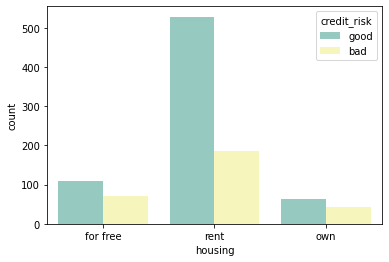

In [ ]:
sns.countplot(x='housing', data=dataset, hue='credit_risk', palette='Set3')

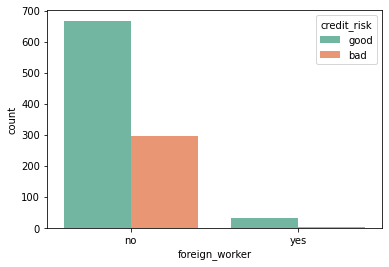

In [ ]:
sns.countplot(x='foreign_worker', data=dataset, hue='credit_risk', palette='Set2')

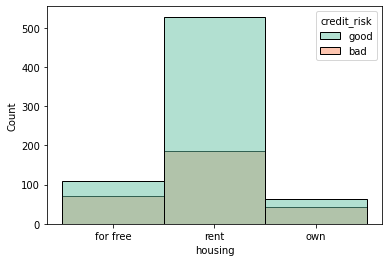

In [ ]:
sns.histplot(x='housing', data=dataset, hue='credit_risk', palette='Set2')

In [ ]:
#print the sum unique value from each column
print(dataset.nunique())


status                       4
duration                    33
credit_history               5
purpose                     10
amount                     923
savings                      5
employment_duration          5
installment_rate             4
personal_status_sex          4
other_debtors                3
present_residence            4
property                     4
age                         53
other_installment_plans      3
housing                      3
number_credits               4
job                          4
people_liable                2
telephone                    2
foreign_worker               2
credit_risk                  2
dtype: int64


In [ ]:
dataset.info()
#insert numeric column name to a variable
data_num = ['age', 'amount', 'duration']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   status                   1000 non-null   object
 1   duration                 1000 non-null   int64 
 2   credit_history           1000 non-null   object
 3   purpose                  1000 non-null   object
 4   amount                   1000 non-null   int64 
 5   savings                  1000 non-null   object
 6   employment_duration      1000 non-null   object
 7   installment_rate         1000 non-null   object
 8   personal_status_sex      1000 non-null   object
 9   other_debtors            1000 non-null   object
 10  present_residence        1000 non-null   object
 11  property                 1000 non-null   object
 12  age                      1000 non-null   int64 
 13  other_installment_plans  1000 non-null   object
 14  housing                  1000 non-null   

--------------------------------------------------------------------------------

In [ ]:
#insert categorical column name to a variable
caterogical_columns = dataset.select_dtypes(include=[np.object]).columns
dataset[caterogical_columns]

<ipython-input-49-6b1f059d7222>:2: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  caterogical_columns = dataset.select_dtypes(include=[np.object]).columns


,status,credit_history,purpose,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,present_residence,property,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,no checking account,all credits at this bank paid back duly,car (used),unknown/no savings account,< 1 yr,< 20,female : non-single or male : single,none,>= 7 yrs,car or other,none,for free,1,skilled employee/official,0 to 2,no,no,good
1,no checking account,all credits at this bank paid back duly,others,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,male : married/widowed,none,1 <= ... < 4 yrs,unknown / no property,none,for free,2023-02-03 00:00:00,skilled employee/official,3 or more,no,no,good
2,... < 0 DM,no credits taken/all credits paid back duly,retraining,... < 100 DM,4 <= ... < 7 yrs,25 <= ... < 35,female : non-single or male : single,none,>= 7 yrs,unknown / no property,none,for free,1,unskilled - resident,0 to 2,no,no,good
3,no checking account,all credits at this bank paid back duly,others,unknown/no savings account,1 <= ... < 4 yrs,20 <= ... < 25,male : married/widowed,none,1 <= ... < 4 yrs,unknown / no property,none,for free,2023-02-03 00:00:00,unskilled - resident,3 or more,no,yes,good
4,no checking account,all credits at this bank paid back duly,others,unknown/no savings account,1 <= ... < 4 yrs,< 20,male : married/widowed,none,>= 7 yrs,car or other,bank,rent,2023-02-03 00:00:00,unskilled - resident,0 to 2,no,yes,good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,no checking account,no credits taken/all credits paid back duly,furniture/equipment,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,male : married/widowed,none,>= 7 yrs,unknown / no property,none,for free,1,unskilled - resident,3 or more,no,no,bad
996,no checking account,no credits taken/all credits paid back duly,others,unknown/no savings account,>= 7 yrs,< 20,male : married/widowed,co-applicant,< 1 yr,unknown / no property,none,rent,1,skilled employee/official,0 to 2,no,no,bad
997,... >= 200 DM / salary for at least 1 year,all credits at this bank paid back duly,others,... >= 1000 DM,>= 7 yrs,< 20,male : married/widowed,none,>= 7 yrs,real estate,none,own,1,manager/self-empl./highly qualif. employee,0 to 2,yes (under customer name),no,bad
998,... < 0 DM,no credits taken/all credits paid back duly,furniture/equipment,... >= 1000 DM,unemployed,25 <= ... < 35,male : married/widowed,none,< 1 yr,real estate,none,rent,1,manager/self-empl./highly qualif. employee,0 to 2,yes (under customer name),no,bad


In [ ]:
columns = ['status', 'credit_history', 'purpose', 'savings', 'employment_duration',
       'installment_rate', 'personal_status_sex', 'other_debtors',
       'present_residence', 'property', 'other_installment_plans', 'housing',
       'number_credits', 'job', 'people_liable', 'telephone', 'foreign_worker',
       'credit_risk']
#print the unique value from the categorical column
for column in columns:
  line=""
  for u in dataset[column].unique():
    line = line + str(u) + ", "
  print(column+" : ", line)

status :  no checking account, ... < 0 DM, ... >= 200 DM / salary for at least 1 year, 0<= ... < 200 DM, 
credit_history :  all credits at this bank paid back duly, no credits taken/all credits paid back duly, existing credits paid back duly till now, delay in paying off in the past, critical account/other credits elsewhere, 
purpose :  car (used), others, retraining, furniture/equipment, car (new), business, domestic appliances, radio/television, repairs, vacation, 
savings :  unknown/no savings account, ... <  100 DM, 100 <= ... <  500 DM, ... >= 1000 DM, 500 <= ... < 1000 DM, 
employment_duration :  < 1 yr, 1 <= ... < 4 yrs, 4 <= ... < 7 yrs, unemployed, >= 7 yrs, 
installment_rate :  < 20, 25 <= ... < 35, 20 <= ... < 25, >= 35, 
personal_status_sex :  female : non-single or male : single, male : married/widowed, female : single, male : divorced/separated, 
other_debtors :  none, guarantor, co-applicant, 
present_residence :  >= 7 yrs, 1 <= ... < 4 yrs, 4 <= ... < 7 yrs, < 1 yr, 
pr

In [ ]:
#change categorical value to "A" format
dataset['status'] = dataset['status'].replace(['no checking account', '... < 0 DM', '... >= 200 DM / salary for at least 1 year', '0<= ... < 200 DM'],
                                              ['A14', 'A11', 'A12', 'A13'])
dataset['credit_history'] = dataset['credit_history'].replace(['all credits at this bank paid back duly', 'no credits taken/all credits paid back duly', 'existing credits paid back duly till now',
                                                               'delay in paying off in the past', 'critical account/other credits elsewhere'],
                                                              ['A31', 'A30', 'A32', 'A33', 'A34'])
dataset['purpose'] = dataset['purpose'].replace(['car (used)', 'others', 'retraining', 'furniture/equipment', 'car (new)', 'business', 'domestic appliances', 'radio/television', 'repairs', 'vacation'],
                                                ['A41', 'A410', 'A48', 'A42', 'A40', 'A49', 'A44', 'A43', 'A45', 'A47'])
dataset['savings'] = dataset['savings'].replace(['unknown/no savings account', '... <  100 DM', '100 <= ... <  500 DM', '... >= 1000 DM', '500 <= ... < 1000 DM'],
                                                ['A65', 'A61', 'A62', 'A64', 'A63'])
dataset['employment_duration'] = dataset['employment_duration'].replace(['< 1 yr', '1 <= ... < 4 yrs', '4 <= ... < 7 yrs', 'unemployed', '>= 7 yrs'],
                                                                        ['A72', 'A73', 'A74', 'A71', 'A75'])
dataset['installment_rate'] = dataset['installment_rate'].replace(['< 20', '25 <= ... < 35', '20 <= ... < 25', '>= 35'],
                                                                  ['A80', 'A82', 'A81', 'A83'])
dataset['personal_status_sex'] = dataset['personal_status_sex'].replace(['female : non-single or male : single', 'male : married/widowed', 'female : single', 'male : divorced/separated'],
                                                                        ['A93', 'A94', 'A95', 'A91'])
dataset['other_debtors'] = dataset['other_debtors'].replace(['none', 'guarantor', 'co-applicant'], ['A101', 'A103', 'A102'])
dataset['present_residence'] = dataset['present_residence'].replace(['>= 7 yrs', '1 <= ... < 4 yrs', '4 <= ... < 7 yrs', '< 1 yr'],
                                                                    ['A114', 'A112', 'A113', 'A111'])
dataset['property'] = dataset['property'].replace(['car or other', 'unknown / no property', 'building soc. savings agr./life insurance', 'real estate'],
                                                  ['A123', 'A124', 'A122', 'A121'])
dataset['other_installment_plans'] = dataset['other_installment_plans'].replace(['none', 'bank', 'stores'], ['A143', 'A141', 'A142'])
dataset['housing'] = dataset['housing'].replace(['for free', 'rent', 'own'], ['A153', 'A151', 'A152'])
dataset['job'] = dataset['job'].replace(['skilled employee/official', 'unskilled - resident', 'unemployed/unskilled - non-resident', 'manager/self-empl./highly qualif. employee'],
                                        ['A173', 'A172', 'A171', 'A174'])
dataset['people_liable'] = dataset['people_liable'].replace([ '0 to 2', '3 or more'], ['A181', 'A182'])
dataset['telephone'] = dataset['telephone'].replace(['no', 'yes (under customer name)'], ['A191', 'A192'])
dataset['foreign_worker'] = dataset['foreign_worker'].replace(['no', 'yes'], ['A202', 'A201'])
dataset

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,A14,18,A31,A41,1049,A65,A72,A80,A93,A101,...,A123,21,A143,A153,1,A173,A181,A191,A202,good
1,A14,9,A31,A410,2799,A65,A73,A82,A94,A101,...,A124,36,A143,A153,2023-02-03 00:00:00,A173,A182,A191,A202,good
2,A11,12,A30,A48,841,A61,A74,A82,A93,A101,...,A124,23,A143,A153,1,A172,A181,A191,A202,good
3,A14,12,A31,A410,2122,A65,A73,A81,A94,A101,...,A124,39,A143,A153,2023-02-03 00:00:00,A172,A182,A191,A201,good
4,A14,12,A31,A410,2171,A65,A73,A80,A94,A101,...,A123,38,A141,A151,2023-02-03 00:00:00,A172,A181,A191,A201,good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,A14,24,A30,A42,1987,A65,A73,A82,A94,A101,...,A124,21,A143,A153,1,A172,A182,A191,A202,bad
996,A14,24,A30,A410,2303,A65,A75,A80,A94,A102,...,A124,45,A143,A151,1,A173,A181,A191,A202,bad
997,A12,21,A31,A410,12680,A64,A75,A80,A94,A101,...,A121,30,A143,A152,1,A174,A181,A192,A202,bad
998,A11,12,A30,A42,6468,A64,A71,A82,A94,A101,...,A121,52,A143,A151,1,A174,A181,A192,A202,bad


In [ ]:
#checking the missing value
dataset.isnull().sum()

status                     0
duration                   0
credit_history             0
purpose                    0
amount                     0
savings                    0
employment_duration        0
installment_rate           0
personal_status_sex        0
other_debtors              0
present_residence          0
property                   0
age                        0
other_installment_plans    0
housing                    0
number_credits             0
job                        0
people_liable              0
telephone                  0
foreign_worker             0
credit_risk                0
dtype: int64

In [ ]:
#change the categorical value to int
encode = preprocessing.LabelEncoder()

for col in caterogical_columns:
  dataset[col] = dataset[col].astype(str)
  dataset[col] = encode.fit_transform(dataset[col])

for column in columns:
  line=""
  for u in dataset[column].unique():
    line = line + str(u) + ", "
  print(column+" : ", line)

status :  3, 0, 1, 2, 
credit_history :  1, 0, 2, 3, 4, 
purpose :  1, 2, 8, 3, 0, 9, 5, 4, 6, 7, 
savings :  4, 0, 1, 3, 2, 
employment_duration :  1, 2, 3, 0, 4, 
installment_rate :  0, 2, 1, 3, 
personal_status_sex :  1, 2, 3, 0, 
other_debtors :  0, 2, 1, 
present_residence :  3, 1, 2, 0, 
property :  2, 3, 1, 0, 
other_installment_plans :  2, 0, 1, 
housing :  2, 0, 1, 
number_credits :  0, 1, 2, 3, 
job :  2, 1, 0, 3, 
people_liable :  0, 1, 
telephone :  0, 1, 
foreign_worker :  1, 0, 
credit_risk :  1, 0, 


--------------------------------------------------------------------------------

In [ ]:
#scaling the int value (except from caterogical column) using min max
for num_col in data_num:
  dataset[num_col] = (dataset[num_col] - dataset[num_col].min()) / (dataset[num_col].max() - dataset[num_col].min())

dataset

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,3,0.205882,1,1,0.043964,4,1,0,1,0,...,2,0.035714,2,2,0,2,0,0,1,1
1,3,0.073529,1,2,0.140255,4,2,2,2,0,...,3,0.303571,2,2,1,2,1,0,1,1
2,0,0.117647,0,8,0.032519,0,3,2,1,0,...,3,0.071429,2,2,0,1,0,0,1,1
3,3,0.117647,1,2,0.103004,4,2,1,2,0,...,3,0.357143,2,2,1,1,1,0,0,1
4,3,0.117647,1,2,0.105700,4,2,0,2,0,...,2,0.339286,0,0,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,0.294118,0,3,0.095576,4,2,2,2,0,...,3,0.035714,2,2,0,1,1,0,1,0
996,3,0.294118,0,2,0.112964,4,4,0,2,1,...,3,0.464286,2,0,0,2,0,0,1,0
997,1,0.250000,1,2,0.683944,3,4,0,2,0,...,0,0.196429,2,1,0,3,0,1,1,0
998,0,0.117647,0,3,0.342137,3,0,2,2,0,...,0,0.589286,2,0,0,3,0,1,1,0


In [ ]:
#separate atribute data and target data
x_data, y_data = dataset.drop("credit_risk", axis=1), dataset['credit_risk']

print("X:",x_data)
print("Y:",y_data)

X:      status  duration  credit_history  purpose    amount  savings  \
0         3  0.205882               1        1  0.043964        4   
1         3  0.073529               1        2  0.140255        4   
2         0  0.117647               0        8  0.032519        0   
3         3  0.117647               1        2  0.103004        4   
4         3  0.117647               1        2  0.105700        4   
..      ...       ...             ...      ...       ...      ...   
995       3  0.294118               0        3  0.095576        4   
996       3  0.294118               0        2  0.112964        4   
997       1  0.250000               1        2  0.683944        3   
998       0  0.117647               0        3  0.342137        3   
999       3  0.382353               0        1  0.335644        3   

     employment_duration  installment_rate  personal_status_sex  \
0                      1                 0                    1   
1                      2          

In [ ]:
#separating train data and test data
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.3)
x_train, y_train

(     status  duration  credit_history  purpose    amount  savings  \
 584       3  0.117647               0        1  0.419005        4   
 298       0  0.117647               0        1  0.040332        2   
 894       0  0.294118               2        1  0.099813        4   
 982       0  0.647059               1        1  0.266645        4   
 45        3  0.205882               0        2  0.053153        4   
 ..      ...       ...             ...      ...       ...      ...   
 372       0  0.294118               1        0  0.413118        2   
 297       1  0.029412               2        8  0.082150        0   
 58        1  0.250000               0        3  0.160119        3   
 742       3  0.294118               0        1  0.151095        3   
 274       1  0.294118               0        0  0.133157        4   
 
      employment_duration  installment_rate  personal_status_sex  \
 584                    4                 0                    2   
 298                  

Fitting 5 folds for each of 144 candidates, totalling 720 fits
{'algorithm': 'SAMME.R', 'learning_rate': 0.9, 'n_estimators': 30}
train: 0.81143
test: 0.72333
300


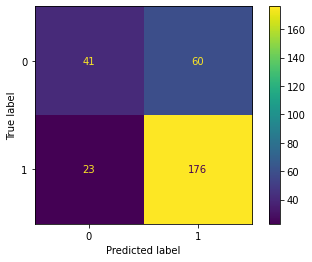

In [ ]:
#USING LIBRARY

#building a decision tree with 1 node
stump = DecisionTreeClassifier(random_state=10, max_depth=1)

#print(stump.score(x_train, y_train))
#print(stump.score(x_test, y_test))

#modeling the Adaptive Boosting
boost = AdaBoostClassifier(base_estimator=stump)
params={
    'n_estimators':[1,2,3,4,5,8,10,20,30,40,50,100],
    'algorithm':['SAMME', 'SAMME.R'],
    'learning_rate':[(0.90 + x/10) for x in range(0,6)]
}
#searching the best parameter for the best output from adaboost
model = GridSearchCV(boost, params, cv=5, verbose=1)
model.fit(x_train, y_train)
print(model.best_params_)

#predicting the model with test data
y_pred = model.predict(x_test)

#printing the accuracy
print("train: %.5f" %model.score(x_train, y_train))
print("test: %.5f" %accuracy_score(y_pred, y_test))

print(len(y_pred))

#show the confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
cm_display.plot()
plt.show()